# Processing the data

In [ ]:
# download the data file from the drive
!curl -LOJ 'https://drive.google.com/uc?export=download&id=17KDl-ktcg5yOZLAbodtMDqwFACdv87zb'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')
print(data.head())

# converting sex, smoker, region into categorical varibale 
from sklearn.preprocessing import LabelEncoder

# sex
data.sex = LabelEncoder().fit_transform(data.sex) 

# smoker or not
data.smoker = LabelEncoder().fit_transform(data.smoker)

# region
data.region = LabelEncoder().fit_transform(data.region)

print(data.head())

# Data input output devision (without removing outliers)
x = data.drop(['charges'], axis = 1)
y = data['charges']
print(y.head())

# split the data set as 15% in test set and 85% in training set (without removing outliers)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    906      0 --:--:-- --:--:-- --:--:--   908
100 55628  100 55628    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k
curl: Saved to filename 'insurance.csv'
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705     

# Random forest

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


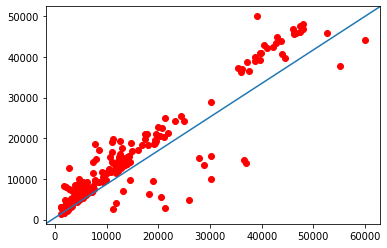

In [ ]:
# Run random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

yrf_train = rf.predict(x_train)
yrf_test = rf.predict(x_test)


# Print default params
print(rf.get_params)


# Error measurement for random forest using root mean square method
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics

train_rf_error = math.sqrt(metrics.mean_squared_error(y_train, yrf_train))
test_rf_error = math.sqrt(metrics.mean_squared_error(y_test, yrf_test))


# To observe how deviant the predicted values are in comparisn to actual test set values
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_test,yrf_test,color='red')
plt.show()

In this graph, the data set is very close to the line which indicates that the predicted values are very close to the actual values. 

Therefore, this model seem to provide an adequate fit and should be explored a little bit further to see if any betterment is possible.

How suitable the model was for the training ? Lets see.

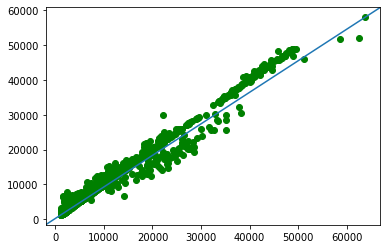

In [ ]:
# To observe how deviant the predicted values are in comparisn to actual train set values
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_train,yrf_train,color='green')
plt.show()

# Removing outliers 

Let's see if i can minimize test error by removing some outliers. 

Q1:  age           27.00000
sex            0.00000
bmi           26.29625
children       0.00000
smoker         0.00000
region         1.00000
charges     4740.28715
Name: 0.25, dtype: float64

Q3:  age            51.000000
sex             1.000000
bmi            34.693750
children        2.000000
smoker          0.000000
region          2.000000
charges     16639.912515
Name: 0.75, dtype: float64
IQR:  age            24.000000
sex             1.000000
bmi             8.397500
children        2.000000
smoker          0.000000
region          1.000000
charges     11899.625365
dtype: float64
Now the length total the data =  1338
Without outlier =  1055
outlier removed =  283
   age  sex     bmi  children  smoker  region      charges
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
5   31    0  25.740    

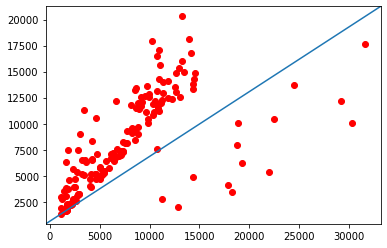

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------------------
# EXPERIMENTING ABOUT OUTLIERS
# ------------------------------------------------------------------------------------------------------------------------------------ 

# Remove the outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

print("Q1: ",Q1)
print()
print("Q3: ",Q3)
IQR = Q3 - Q1
print("IQR: ",IQR)

data_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Now the length total the data = ",len(data))
print("Without outlier = ",len(data_iqr))
print('outlier removed = ', len(data) - len(data_iqr))

print(data_iqr.head())

# # converting sex, smoker, region into categorical varibale of the data without outlier
# from sklearn.preprocessing import LabelEncoder
# data_iqr.sex = LabelEncoder().fit_transform(data_iqr.sex) 
# data_iqr.smoker = LabelEncoder().fit_transform(data_iqr.smoker)
# data_iqr.region = LabelEncoder().fit_transform(data_iqr.region)

# Split features and target
# With removing outliers
x_filtered = data_iqr.drop(['charges'], axis = 1)
y_filtered = data_iqr['charges']
x_filtered.head()

# split the data set as 15% in test set and 85% in training set (with removing outliers)
x_filtered_train, x_filtered_test, y_filtered_train, y_filtered_test = train_test_split(x_filtered, y_filtered, test_size=0.15)

# To check the structure of the data
print(x_filtered_train.shape)
print(x_filtered_test.shape)
print(y_filtered_train.shape)
print(y_filtered_test.shape)


# Run random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_filtered_train, y_filtered_train)

yrf_filtered_train = rf.predict(x_filtered_train)
yrf_filtered_test = rf.predict(x_filtered_test)

# Error measurement using root mean square method with outlier
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics

train_rf_filtered_error = math.sqrt(metrics.mean_squared_error(y_filtered_train, yrf_filtered_train))
test_rf_filtered_error = math.sqrt(metrics.mean_squared_error(y_filtered_test, yrf_filtered_test))

# To observe how deviant the predicted values are in comparisn to actual test set values
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_filtered_test,yrf_filtered_test,color='red')
plt.show()

No! filtered results are more deviant than on the whole data set. 

# Polinomial feature transformation

---
As removing the outliers did not help, rather it increased errors, so I am applying polynomial feature transformation, and i am planning to apply 10 foold cross validation with randomsearch and gridsearch after that. 


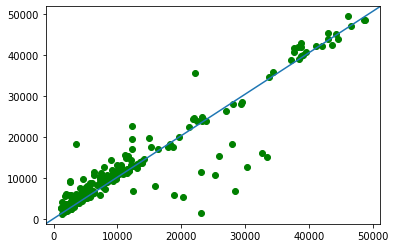

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 3)
x_quad = quad.fit_transform(x)

xp_train, xp_test, yp_train, yp_test = train_test_split(x_quad, y, test_size=0.15, random_state=42)

# Running random forest without 10 fold cross validation and storing errors
rf = RandomForestRegressor()
rf.fit(xp_train, yp_train)

yrfp_train_pred = rf.predict(xp_train)
yrfp_test_pred = rf.predict(xp_test)

# Error measurement using root mean square method with outlier
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics

train_rf_poli_error = math.sqrt(metrics.mean_squared_error(yp_train, yrfp_train_pred))
test_rf_poli_error = math.sqrt(metrics.mean_squared_error(yp_test, yrfp_test_pred))

# To observe how deviant the predicted values are in comparisn to actual test set values
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(yp_test,yrfp_test_pred,color='green')
plt.show()

# Single hyperparameter tuning

-------------------------------

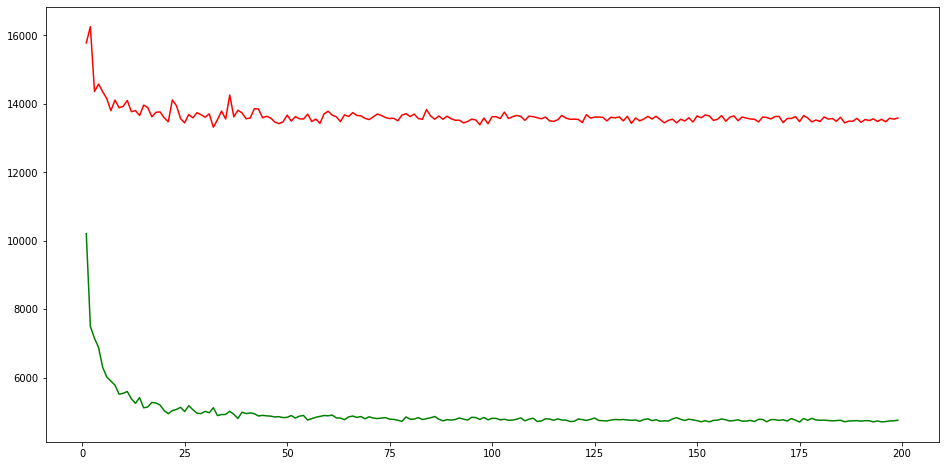

In [ ]:
rmlse_test = []
rmlse_train = []

rf = RandomForestRegressor(n_estimators = 1)

for i in range(1,200):
    rf.fit(xp_train, yp_train)

    yp_estimator_train = rf.predict(xp_train)
    yp_estimator_test = rf.predict(xp_test)
    
    rmlse_train.append(math.sqrt(metrics.mean_squared_error(yp_train, yp_estimator_train)))
    rmlse_test.append(math.sqrt(metrics.mean_squared_error(yp_test, yp_estimator_test)))
    # print('n_estimators: %d, RMLSE Train: %.3f, RMLSE Test: %.3f' % (i, rmlse_train[-1], rmlse_test[-1]))
    
    rf.n_estimators += 1

plt.figure(figsize=(16,8))
plt.plot(range(1,200), rmlse_train, 'g')
plt.plot(range(1,200), rmlse_test,'r')

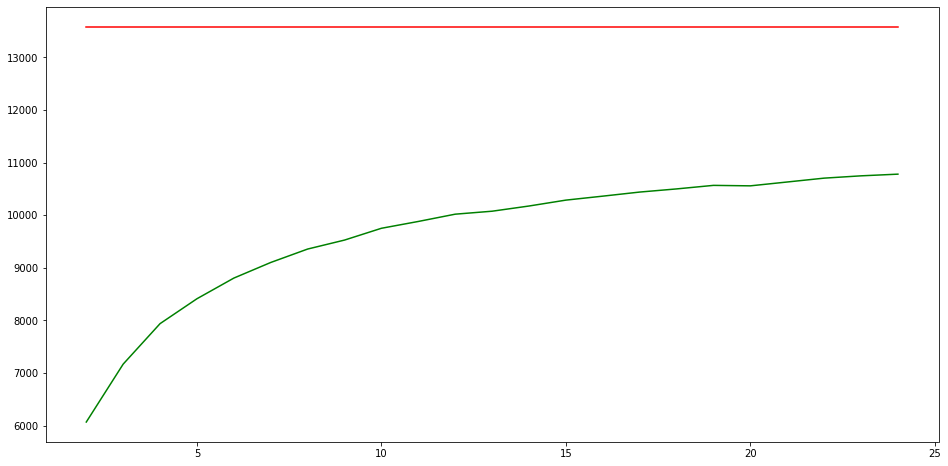

In [ ]:
rmlse_test = []
rmlse_train = []

rf = RandomForestRegressor(min_samples_leaf = 2)

for i in range(2,25):
    rf.fit(xp_train, yp_train)

    yp_msl_train = rf.predict(xp_train)
    yp_msl_test = rf.predict(xp_test)
    
    rmlse_train.append(math.sqrt(metrics.mean_squared_error(yp_train, yp_msl_train)))
    rmlse_test.append(math.sqrt(metrics.mean_squared_error(yp_test, yp_estimator_test)))
    
    
    rf.min_samples_leaf += 1

plt.figure(figsize=(16,8))
plt.plot(range(2,25), rmlse_train, 'g')
plt.plot(range(2,25), rmlse_test,'r')

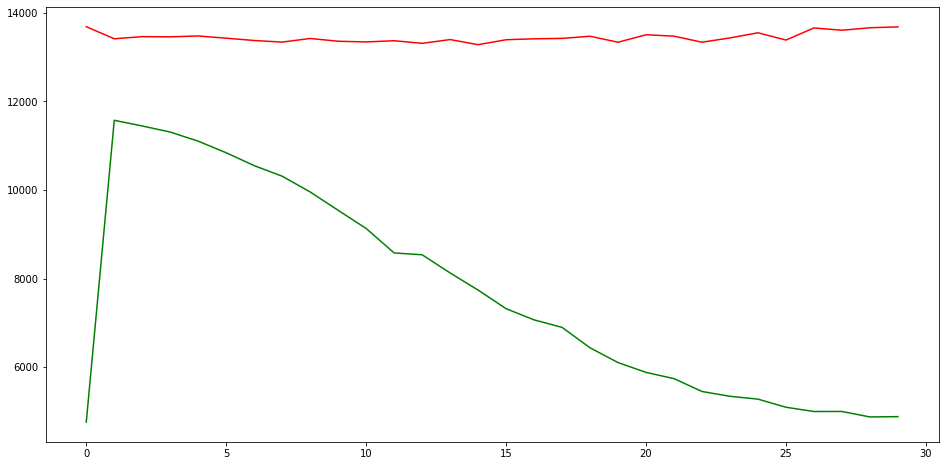

In [ ]:
rmlse_test = []
rmlse_train = []

rf = RandomForestRegressor(max_depth = None)

for i in range(0,30):
    rf.fit(xp_train, yp_train)

    yp_depth_train = rf.predict(xp_train)
    yp_depth_test = rf.predict(xp_test)
    
    rmlse_train.append(math.sqrt(metrics.mean_squared_error(yp_train, yp_depth_train)))
    rmlse_test.append(math.sqrt(metrics.mean_squared_error(yp_test, yp_depth_test)))
    # print('max_depth: %d, RMLSE Train: %.3f, RMLSE Test: %.3f' % (i, rmlse_train[-1], rmlse_test[-1]))
    
    rf.max_depth = i + 1

plt.figure(figsize=(16,8))
plt.plot(range(0,30), rmlse_train, 'g')
plt.plot(range(0,30), rmlse_test,'r')



# Hyperparameter tuning & Cross validation

---
with 10 fold cross validation on polinomial random forest using GRIDSEARCH & RANDOMIZEDSEARCH

# Randomized search





Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


Best Hyperparameters: {'n_estimators': 834, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}


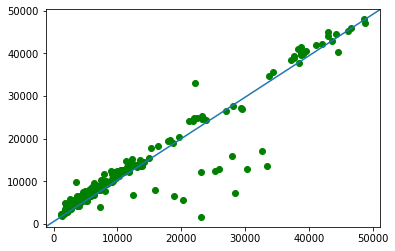

In [ ]:
# run polinomial random forest with 10 fold cross validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(xp_train, yp_train)

# predict
yrfp_kfold_train_pred = rf_random.predict(xp_train)
yrfp_kfold_test_pred = rf_random.predict(xp_test)

# summarize result
print('Best Hyperparameters: %s' % rf_random.best_params_)

# Errors after runnning random forest with 10 fold cross validation on polynomial featured dataset
train_rf_poli_randsearch_error = math.sqrt(metrics.mean_squared_error(yp_train, yrfp_kfold_train_pred))
test_rf_poli_randsearch_error = math.sqrt(metrics.mean_squared_error(yp_test, yrfp_kfold_test_pred))

# To observe how deviant the predicted values are in comparisn to actual test set values
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(yp_test,yrfp_kfold_test_pred,color='green')
plt.show()

# Grid search

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 70.9min finished


Best Hyperparameters: {'n_estimators': 834, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}


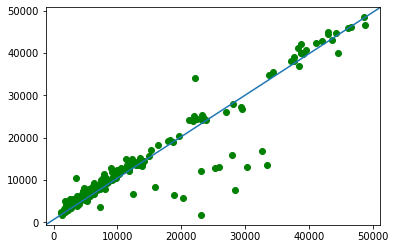

In [ ]:
# run polinomial random forest with 10 fold cross validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [50, 100, 150, 200, 500]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 20, 50, 70, 100]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_gird = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
rf_gird.fit(xp_train, yp_train)

# predict
yrf_gridSearch_train = rf_gird.predict(xp_train)
yrf_gridSearch_test = rf_gird.predict(xp_test)

# summarize result
print('Best Hyperparameters: %s' % rf_random.best_params_)

# error measurement for random forest using root mean square method
train_yrf_gridSearch_error = (math.sqrt(metrics.mean_squared_error(y_train, yrf_gridSearch_train)))
test_yrf_gridSearch_error = (math.sqrt(metrics.mean_squared_error(y_test, yrf_gridSearch_test)))

# To observe how deviant the predicted values are in comparisn to actual test set values
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(yp_test,yrf_gridSearch_test,color='green')
plt.show()

# Printing all Errors

In [ ]:
print("Random forest")
print("train error=", train_rf_error,"testing error=", test_rf_error)
print()

print("Random forest with outlier removed")
print("train error=", train_rf_filtered_error,"testing error=", test_rf_filtered_error)
print()

print("Random forest with polinomial feature transformation")
print("train error=", train_rf_poli_error,"testing error=", test_rf_poli_error)
print()

print("Random forest with polinomial feature transformation and randomizedsearch kfold")
print("train error=", train_rf_poli_randsearch_error,"testing error=", test_rf_poli_randsearch_error)
print()

print("Random forest with polinomial feature transformation and gridsearch kfold")
print("train error=", train_yrf_gridSearch_error,"testing error=", test_yrf_gridSearch_error)
print()

Random forest
train error= 1771.9512476097302 testing error= 5634.957321097497

Random forest with outlier removed
train error= 1884.9680736611988 testing error= 4569.092900879473

Random forest with polinomial feature transformation
train error= 1841.964963455785 testing error= 4667.095759830013

Random forest with polinomial feature transformation and randomizedsearch kfold
train error= 3585.5124961606643 testing error= 4228.4801184777625

Random forest with polinomial feature transformation and gridsearch kfold
train error= 3430.920904870764 testing error= 5300.262345659142



Random forest
train error= 1903.076440497707 testing error= 4386.229896785648

Random forest with outlier removed
train error= 1873.3040035724196 testing error= 4428.493550080805

Random forest with polinomial feature transformation
train error= 1867.2690685212274 testing error= 4616.240832364482

Random forest with polinomial feature transformation
train error= 3568.6574558353987 testing error= 4237.377053560215

Random forest
train error= 1771.9512476097302 testing error= 5634.957321097497

Random forest with outlier removed
train error= 1884.9680736611988 testing error= 4569.092900879473

Random forest with polinomial feature transformation
train error= 1841.964963455785 testing error= 4667.095759830013

Random forest with polinomial feature transformation and randomizedsearch kfold
train error= 3585.5124961606643 testing error= 4228.4801184777625

Random forest with polinomial feature transformation and gridsearch kfold
train error= 3430.920904870764 testing error= 5300.262345659142